In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/BABZMAN(ABA)/Desktop/WORKS/Data sci/fake-news/train.csv")

In [3]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


1. Checking correlation between amount of words and reliability of news

In [11]:
def word_count(news):
    return len(str(news))
data["words"]=data["text"].apply(word_count)
data[["label","words"]].groupby("label").mean()

,words
label,
0,5214.130452
1,3875.911649


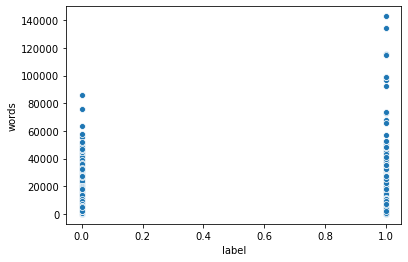

In [13]:
corr1=data[["words","label"]].corr()
sns.scatterplot(x="label",y="words",data=data)

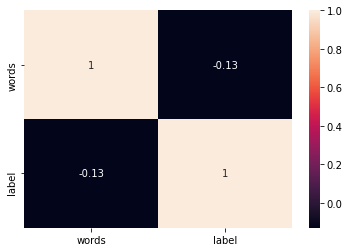

In [15]:
sns.heatmap(corr1,annot=True)

As we can see, there is a very weak correlation between number of words and reliability. Though the description of the data showed that fake news tend to be less in words, it is not major feature to determine reliability. Then again, the relatively small length of fake news can be attributed to lack of credible sources to back statements. False news is also a lot easier to spread when it is as short as possible, allowing wanted reactions and clicks from readers as soon as possible.

2. Checking for most appeared words/Names

In [18]:
popular=[]
def word_counter(a):
    
        b=str(a).split()
        for d in b:
            popular.append(d)
words=data["title"].apply(word_counter)

In [19]:
words=[]
for a in popular:
    if a not in words:
        words.append(a)
        if popular.count(a)>1000:
            print(a,str(popular.count(a)))
    else:
        continue

- 9177
Breitbart 2396
the 3183
to 4380
Trump 2500
of 3218
The 8354
New 7038
York 6350
Times 6323
a 2055
and 2010
in 2950


 From the list above excluding words that are not nouns, we can see that fake news tend to have popular figures that may or may not be liked in their headlines particularly political figures. We can also see how that videos appears alot in these fake news, which is yet another means to draw more readers and or get more clicks